# FastAI
I am currently working through FastAI's MOOC released January 2019. Jeremy Howard continually indicates that you can get world class results in a few lines of code. I was admittedly skeptical, but working through a couple of lessons and applying the example code to a dataset of common North American birds, I was able improve upon current state-of-the-art accuracy rate on a public dataset. Maybe?!?

## Current State-of-the-Art
The most current paper that I could find reporting state-of-the-art results on the NABirds dataset was published in arXiv September 2018. The current best results found in [Aligned to the Object, not to the Image: A Unified Pose-aligned Representation for Fine-grained Recognition](https://arxiv.org/pdf/1801.09057.pdf)​ got a 87.9% accuracy. Using the FastAI library for deep learning image processing I was able to attain 89.5% accuracy.

#### Qualifier
To get the 89.5% accuracy, I used a random 80/20 train/test split of the images in the dataset. The dataset provides a 50/50 train/test split used in a paper from 2015 when the dataset was assembled. I have reached out to the main author of the current state-of-the-art paper to see what type of a train/test split was used in their research and have not heard back yet. Using the train/test split from the dataset, my accuracy is 84.7%.

## Data
The data for this project is available from [The Cornell Lab of Ornithology](http://dl.allaboutbirds.org/nabird) ​and is a collection of 48,562 photos featuring 400 common species of North America's birds with subcategies including male, female, juvenile, and color phases bringing the total categories to 555.

Data provided by the Cornell Lab of Ornithology, with thanks to photographers and contributors of crowdsourced data at [AllAboutBirds](http://merlin.allaboutbirds.org/​). This material is based upon work supported by the National Science Foundation under Grant No. 101081.​

In [27]:
%reload_ext autoreload
%autoreload 2

from fastai.vision import *  #import fastai library

## Import Data 
Import data from the downloaded images and text files

In [28]:
path = "data/nabirds/" #set path to data downloaded 
path

'data/nabirds/'

In [29]:
#import images text and seperate out category code number
import pandas as pd
images = pd.read_csv(path + '/images.txt', sep=" ", header=None, names=['file','path'])
images['cat_num'] = images['path'].str.split('/').str[0]
images.head()

file  \
0  0000139e-21dc-4d0c-bfe1-4cae3c85c829   
1  0000d9fc-4e02-4c06-a0af-a55cfb16b12b   
2  00019306-9d83-4334-b255-a447742edce3   
3  0001afd4-99a1-4a67-b940-d419413e23b3   
4  000332b8-997c-4540-9647-2f0a8495aecf   

                                        path cat_num  
0  0817/0000139e21dc4d0cbfe14cae3c85c829.jpg    0817  
1  0860/0000d9fc4e024c06a0afa55cfb16b12b.jpg    0860  
2  0900/000193069d834334b255a447742edce3.jpg    0900  
3  0645/0001afd499a14a67b940d419413e23b3.jpg    0645  
4  0929/000332b8997c454096472f0a8495aecf.jpg    0929

In [30]:
#import classes to get common_names
classes = pd.read_table(path + '/classes.txt', delimiter=None)
classes.columns = ['code']
classes[['cat_num','common_name']] = classes['code'].str.split(" ", 1, expand=True)
classes = classes.drop(['code'], axis=1)
classes['cat_num'] = classes['cat_num'].str.zfill(4) #fill missing leading zeros
classes.head()

cat_num                common_name
0    0001    Ducks, Geese, and Swans
1    0002  Grouse, Quail, and Allies
2    0003                      Loons
3    0004                     Grebes
4    0005                     Storks

In [34]:
#merge common_name from classes into images df
images = pd.merge(images, classes,  how='left', on='cat_num')
images.head()

file  \
0  0000139e-21dc-4d0c-bfe1-4cae3c85c829   
1  0000d9fc-4e02-4c06-a0af-a55cfb16b12b   
2  00019306-9d83-4334-b255-a447742edce3   
3  0001afd4-99a1-4a67-b940-d419413e23b3   
4  000332b8-997c-4540-9647-2f0a8495aecf   

                                        path cat_num  \
0  0817/0000139e21dc4d0cbfe14cae3c85c829.jpg    0817   
1  0860/0000d9fc4e024c06a0afa55cfb16b12b.jpg    0860   
2  0900/000193069d834334b255a447742edce3.jpg    0900   
3  0645/0001afd499a14a67b940d419413e23b3.jpg    0645   
4  0929/000332b8997c454096472f0a8495aecf.jpg    0929   

                        common_name_x                       common_name_y  
0                        Oak Titmouse                        Oak Titmouse  
1                            Ovenbird                            Ovenbird  
2                    Savannah Sparrow                    Savannah Sparrow  
3  Eared Grebe (Nonbreeding/juvenile)  Eared Grebe (Nonbreeding/juvenile)  
4                      Eastern Phoebe                      Eastern Phoebe

In [36]:
#import train_test_split and merge with images to get the train_test split provided with dataset
split = pd.read_csv(path + '/train_test_split.txt', sep=" ", header=None, names=['file','train_test'])
images = pd.merge(images, split,  how='left', on='file')
images.head()


file  \
0  0000139e-21dc-4d0c-bfe1-4cae3c85c829   
1  0000d9fc-4e02-4c06-a0af-a55cfb16b12b   
2  00019306-9d83-4334-b255-a447742edce3   
3  0001afd4-99a1-4a67-b940-d419413e23b3   
4  000332b8-997c-4540-9647-2f0a8495aecf   

                                        path cat_num  \
0  0817/0000139e21dc4d0cbfe14cae3c85c829.jpg    0817   
1  0860/0000d9fc4e024c06a0afa55cfb16b12b.jpg    0860   
2  0900/000193069d834334b255a447742edce3.jpg    0900   
3  0645/0001afd499a14a67b940d419413e23b3.jpg    0645   
4  0929/000332b8997c454096472f0a8495aecf.jpg    0929   

                        common_name_x                       common_name_y  \
0                        Oak Titmouse                        Oak Titmouse   
1                            Ovenbird                            Ovenbird   
2                    Savannah Sparrow                    Savannah Sparrow   
3  Eared Grebe (Nonbreeding/juvenile)  Eared Grebe (Nonbreeding/juvenile)   
4                      Eastern Phoebe                      Eastern Phoebe   

   train_test  
0           0  
1           0  
2           0  
3           1  
4           0

## Transforms and Data Loading
I am currently using FastAI default settings to get baseline results, except for batch size (bs)and image size (size). Batch size was reduced to 20 to accomodate my GPU's memory. Image size was increased as a number of the images in the show_batch below were cropped to a degree that removed relevant characteristics for proper classification.

Future research will include adjusting parameters (transforms, size, etc.) to try to improve classification accuracy.

In [10]:
tfms = get_transforms()
data = (ImageItemList.from_df(images, path=path+ '/images', cols='path')
        .split_from_df(col='train_test')
        .label_from_df(cols='common_name')
        .transform(tfms,size=384)
        .databunch(bs=20))

## View the Images
We have birds!

Images appear to be imported properly. My amateur birding abilities indicate the labels match the bird species (at least for the species that I have familiarity). Seen in a previous load of data was, what I bleive, to be one mislabled bird (tufted titmouse versus a black-crested titmouse).

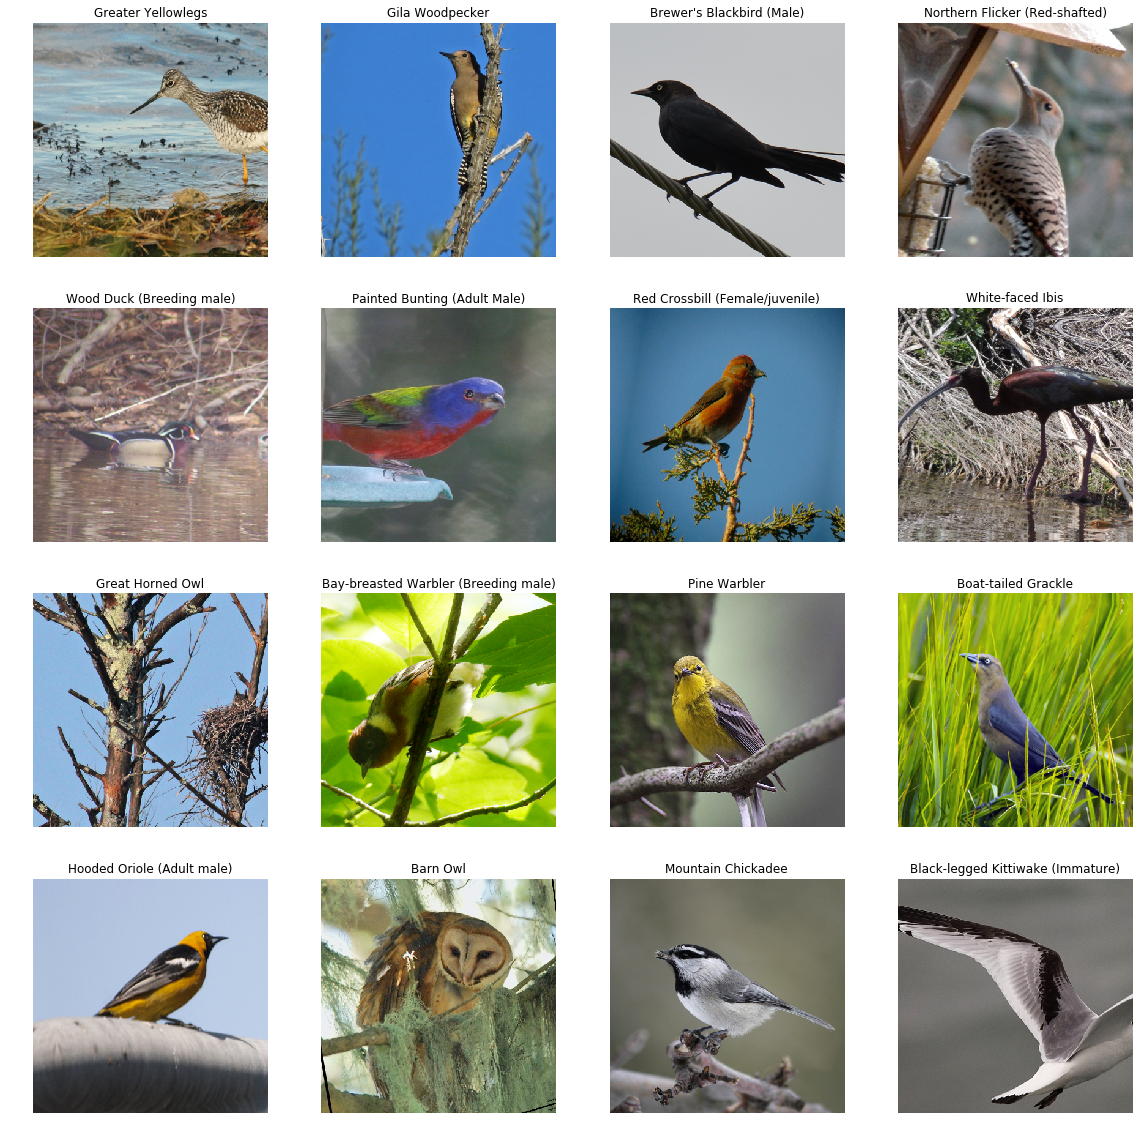

In [11]:
data.show_batch(rows=4)

## Model and Learning Rate

Again all FastAI default settings were used. The resnet50 architecture was used for the backbone and trained for 4 epochs.

In [12]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(4)

In [13]:
learn.save('stage-1')
learn.lr_find()
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


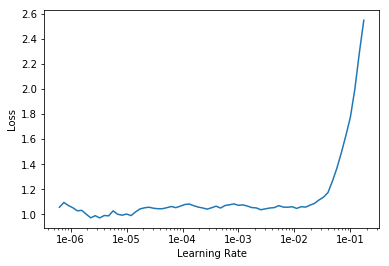

In [14]:
learn.recorder.plot()

## Learning Rate
Find the learning rate from the first 4 epochs and plot. Train for an additional 20 epochs.

In [15]:
learn.fit_one_cycle(20, slice(5e-5,3e-4))

In [16]:
 learn.save('stage-2')

## Prediction Results
Let's take a look at where our model failed. In the various runs previously performed there is a mix of species that are very similar and hard for humans to differentiate, poor image quality, and examples of proper species identification but incorrect male/female/immature or color phase identifications.

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

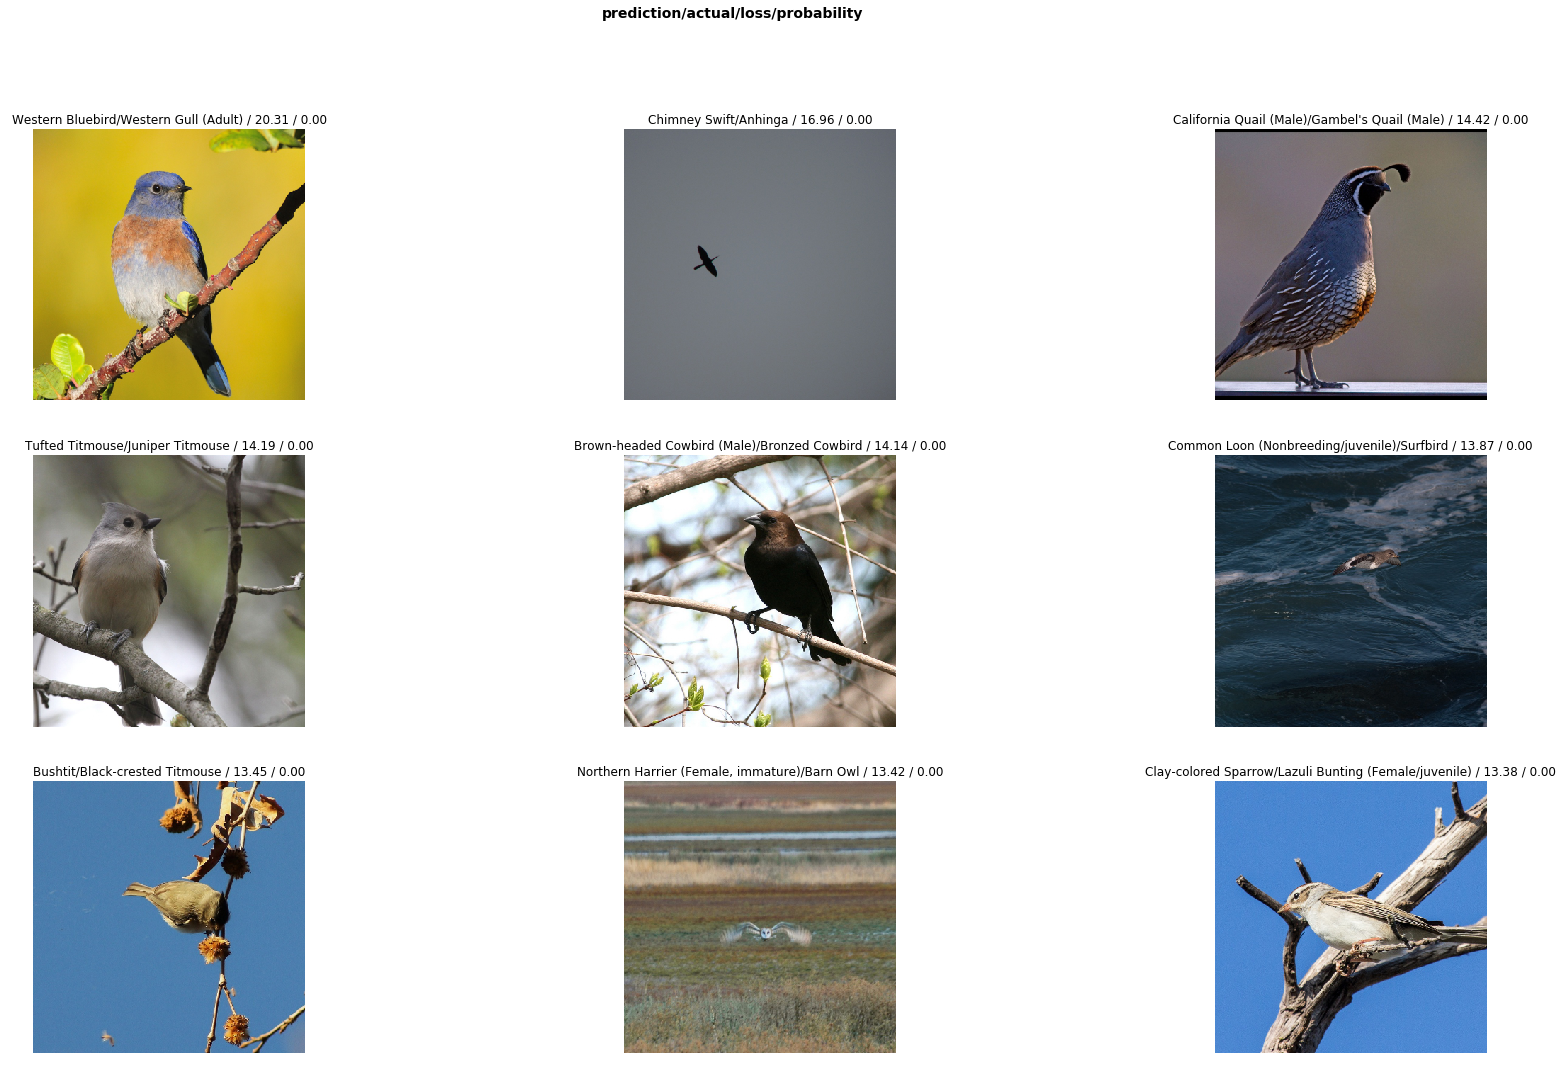

In [18]:
interp.plot_top_losses(9, figsize=(30,17))

## Results
| Attempt  |  Image Size | Epochs  |  Train | Validation  |Test|Accuracy|Notes|
|---|---|---|---|---|---|---|---|
|1|384|10|80%|20%|0%|86.03%|Random Split|
|2|384|20|80%|20%|0%|89.53%|Random Split|
|2a|224|20|80%|20%|0%|~85%|Random Split|
|3|384|20|80%|20%|0%|89.45%|added .normalize(imagenet_stats)|
|4|384|20|50%|50%|0%|84.78%|Employed train/test split provided with dataset|




## Conclusion
No real surprise here, more training data equals better results. If the state-of-the-art paper used the original dataset 50/50 train/test split, then my project has ~3.0% lower accuracy. If the paper used a more standard 80/20 split, then the above work has ~1.5 higher accuracy.

The good news for find-grained bird identification is that with the help of citizen scientists, the high-quality labeled bird image dataset will continue to grow leading to higher accuracies for all.

#### Future Work:
- Compare deep learning architectures (resnet34, resnet50, etc.) for speed and accuracy
- Try different image sizes (image size = 224; accuracy ~85%). A few images seemed to be cropped to small
- Fine-tune parameters and implement different image augmentation techniques
- Create a web app
- Apply this work to a real time bird feeder cam